In [8]:
from IVClassification import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

## Model
let $g(p) = \ln\left( \frac{p}{1-p} \right)$ be the logit function, $X$ be the treatment, $Y$ be the binary outcome, $U$ be the confounder, and $Z$ be the instrumental variable. The generalized linear model can be defined as:
$$
g(\mathbb{E}[Y|X, U])= \beta^{T}X + \eta U
$$
where
$$
\mathbb{E}[X^{T}U]\neq 0, \quad \mathbb{E}[Z^{T}U]=0
$$


### Linear Case
Let the structrual equation be linear:
$$
X = \alpha Z + \gamma U + \epsilon
$$

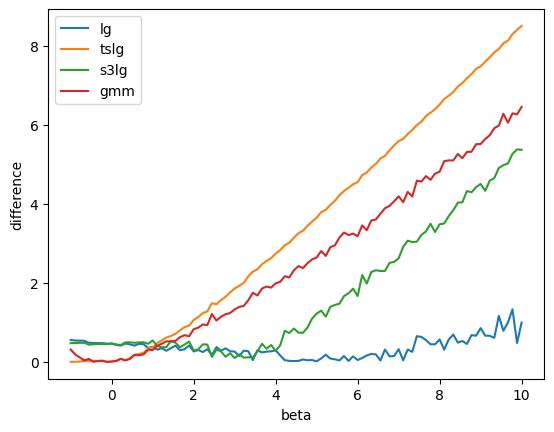

In [5]:
lg_dif = np.array([])
tslg_dif = np.array([])
s3lg_dif = np.array([])
gmm_dif = np.array([])

para_range = np.linspace(-1, 10, 100)

for beta in para_range:
    
    data = sim_data(n=10000, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    
    lg_dif = np.append(lg_dif, np.abs(lg.coef_ - beta))
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_dif = np.append(tslg_dif, np.abs(tslg.coef_ - beta))
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_dif = np.append(s3lg_dif, np.abs(s3lg.coef_ - beta))
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_dif = np.append(gmm_dif, np.abs(gmm.coef_ - beta))
    
    
plt.plot(para_range, lg_dif, label='lg')
plt.plot(para_range, tslg_dif, label='tslg')
plt.plot(para_range, s3lg_dif, label='s3lg')
plt.plot(para_range, gmm_dif, label='gmm')
plt.xlabel('beta')
plt.ylabel('difference')
plt.legend()

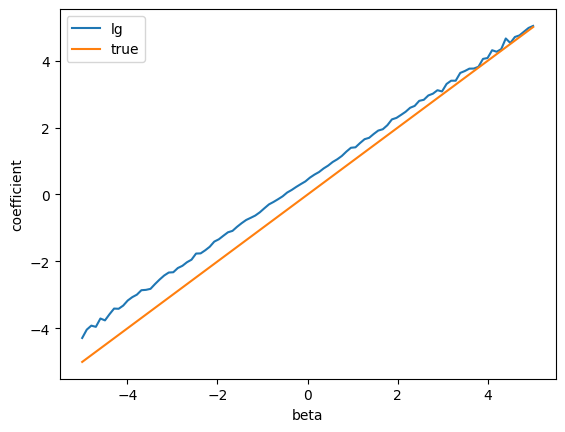

In [18]:
lg_coef = np.array([])

para_range = np.linspace(-5, 5, 100)

for beta in para_range:
    
    data = sim_data(n=10000, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    
    lg_coef = np.append(lg_coef, lg.coef_)
    
plt.plot(para_range, lg_coef, label='lg')
plt.plot(para_range, para_range, label='true')
plt.xlabel('beta')
plt.ylabel('coefficient')
plt.legend()

In [44]:
beta = 6
data = sim_data(n=10000, beta=beta)

lg = LogisticRegression()
lg.fit(data.X.reshape(-1, 1), data.Y)
print(lg.coef_)


[[6.071398]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                          1.026e+04
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:24:38   Log-Likelihood:                         -10689.
No. Observations:               10000   AIC:                                  2.138e+04
Df Residuals:                    9999   BIC:                                  2.139e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5037      0.005    101.283      0.000       0.494       0.513
==============================================================================
Omnibus:                        3.863   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                4.046
Skew:                           0.014   Prob(JB):                        0.132
Kurtosis:                       3.095   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

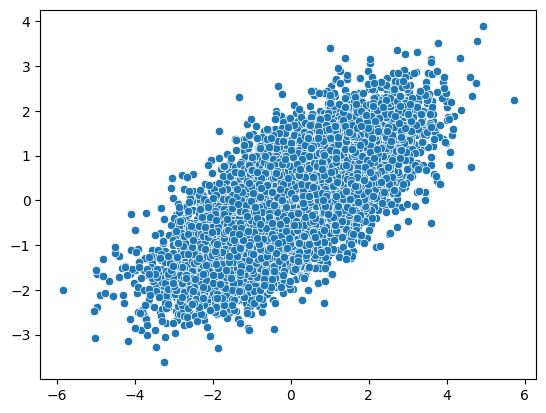

In [48]:
data = sim_data(n=10000)

sns.scatterplot(x=data.X, y=data.U)

import statsmodels.api as sm

model = sm.OLS(data.U, data.X).fit()

model.summary()



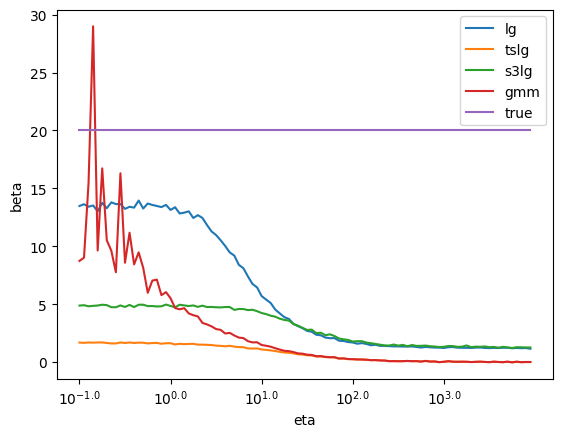

In [17]:
k = np.linspace(-1, 4, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])
beta = 20

for eta in np.power(10, k):
    data = sim_data(n=10000, eta=eta, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    

plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label='gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::20], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::20]])
plt.xlabel('eta')
plt.ylabel('beta')
plt.legend()

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_55739/3049867263.py:5: RuntimeWarning: overflow encountered in power
  for eta in np.power(10, k):


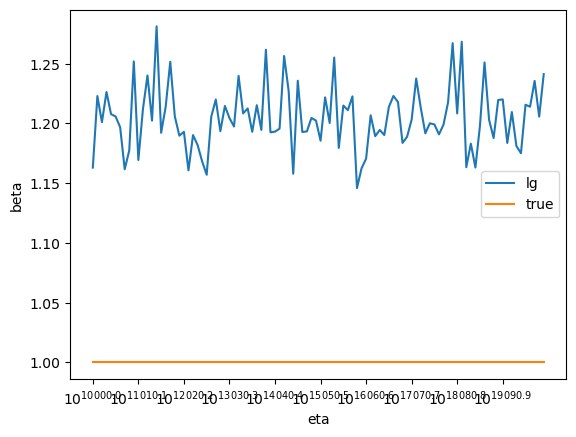

In [3]:
k = np.linspace(10000, 20000, 100)
lg_coef = np.array([])
beta=1

for eta in np.power(10, k):
    data = sim_data(n=10000, eta=eta, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)

plt.plot(k, lg_coef, label='lg')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('eta')
plt.ylabel('beta')
plt.legend()

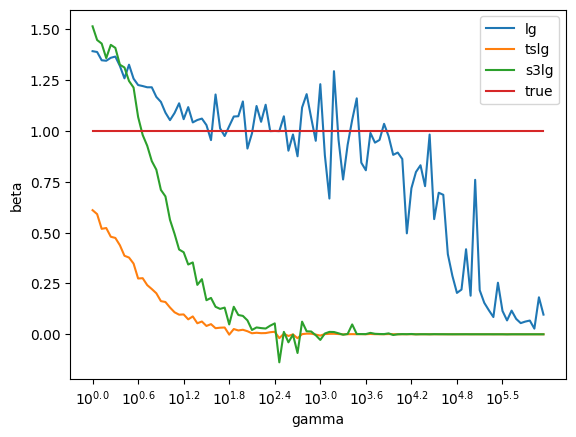

In [9]:
k = np.linspace(0, 6, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])      
gmm_coef = np.array([])
beta = 1

for gamma in np.power(10, k):
    data = sim_data(n=10000, gamma=gamma, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    # gmm = GMM_logit()
    # gmm.fit(data.X, data.Y, data.Z)
    # gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
# plt.plot(k, gmm_coef, label = 'gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()

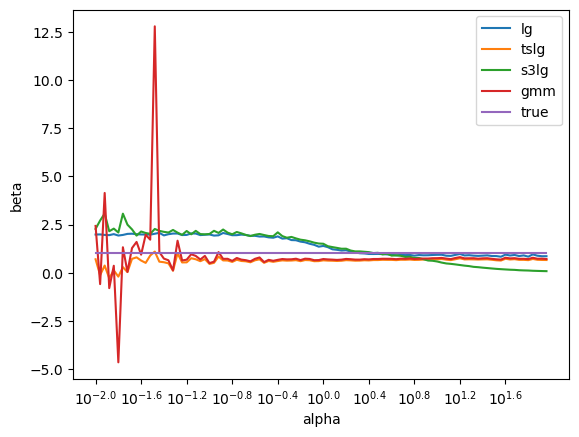

In [6]:
k = np.linspace(-2, 2, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])
beta = 1

for alpha in np.power(10, k):
    data = sim_data(n=10000, alpha=alpha, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label='gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('alpha')
plt.ylabel('beta')
plt.legend()